In [1]:
import numpy as np
import os
from scipy.spatial.distance import squareform, cdist
import seaborn as sns
import timecorr as tc
%matplotlib inline

In [2]:
results_dir = os.path.join(os.path.expanduser('~'), 'Desktop', 'synthetic_data')
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

In [3]:
S = 5 #number of subjects
T = 100 #number of timepoints per event
E = 10 #number of events
K = 100 #number of features

In [4]:
def generate_random_covariance_matrix(N):
    template = np.random.randn(N, N)
    cov = np.multiply(template, template.T)
    return tc.helpers.mat2vec(cov)

In [5]:
#make a timeseries of covariance matrices
covs = np.zeros((E, int((K**2 - K)/2 + K)))
for event in np.arange(E):
    covs[event, :] = generate_random_covariance_matrix(K)

In [6]:
def generate_data(sq_cov, T):
    import warnings
    warnings.simplefilter('ignore')
    covmat = tc.helpers.vec2mat(sq_cov)
    return np.random.multivariate_normal(np.zeros(covmat.shape[0]), covmat, (T))

In [7]:
def generate_subject_data(covs, T):
    data = []
    for i in np.arange(covs.shape[0]):
        data.extend(generate_data(covs[i, :], T))
    return np.vstack(data)

In [14]:
data = []
for s in np.arange(S):
    data.append(generate_subject_data(covs, T))

In [15]:
#fname = os.path.join(results_dir, 'data.npz')
#np.savez(fname, data=data, S=S, T=T, E=E, K=K, covmats=covs)

In [16]:
recovered_covs = tc.timecorr(data, mode='across')

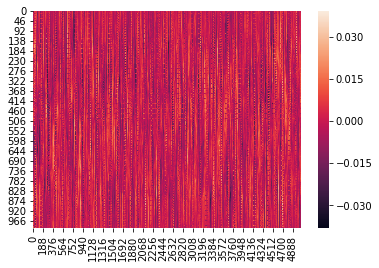

In [17]:
sns.heatmap(recovered_covs)

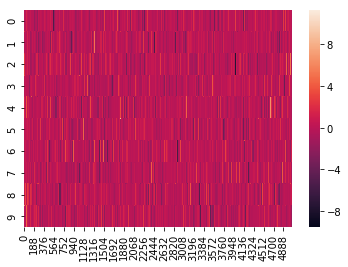

In [18]:
sns.heatmap(covs)

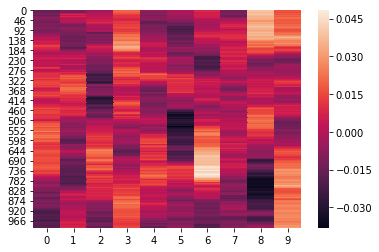

In [20]:
#this should have light spots (high correlations) along the diagonal...
sns.heatmap(1 - cdist(recovered_covs, covs, 'correlation'))